In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks",font="times",font_scale=1.4)

In [31]:
def dft2d(image):
    """
    Compute the 2-dimensional Discrete Fourier Transform without using numpy's fft2 function.
    
    :param image: A 2-dimensional numpy array representing the image.
    :return: A 2-dimensional numpy array containing the Fourier Transform of the image.
    """
    M, N = image.shape
    # Create a 2D array of the same size to store the Fourier Transform
    F = np.zeros((M, N), dtype=np.complex128)

    # Create indices for x and y to use in calculations
    u = np.arange(M)
    v = np.arange(N)
    # Convert u and v to column and row vectors respectively
    u = u.reshape(M, 1)
    v = v.reshape(1, N)

    # Compute the DFT for each frequency domain coordinate (u,v)
    for x in range(M):
        for y in range(N):
            # Compute the 2D DFT using the DFT formula
            F[x, y] = np.sum(image * np.exp(-2j * np.pi * ((u * x / M) + (v * y / N))))

    return F

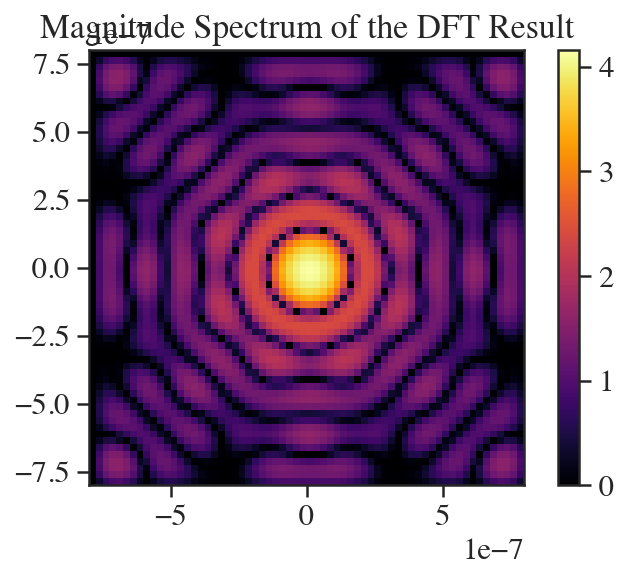

In [39]:
# Create a sample image (e.g., a simple gradient)
# Parameters
wavelength = 1600e-9  # green light, 550 nm
f_number = 5  # F-number of the optical system
diameter = 1  # diameter of the aperture in meters
focal_length = f_number * diameter  # focal length derived from F-number and aperture diameter

# Sampling
sampling_size = 64  # number of samples in each dimension
pupil_plane_size = diameter*5  # size of the pupil plane in meters
focal_plane_size = wavelength * focal_length / pupil_plane_size  # size of the focal plane in meters

# Define the spatial axes for the pupil plane
x_pupil = np.linspace(-pupil_plane_size / 2, pupil_plane_size / 2, sampling_size)
y_pupil = np.linspace(-pupil_plane_size / 2, pupil_plane_size / 2, sampling_size)
xx_pupil, yy_pupil = np.meshgrid(x_pupil, y_pupil)

circle = (xx_pupil**2 + yy_pupil**2) <= (diameter / 2)**2

sample_image = circle

# Compute its 2D DFT
dft_result = dft2d(sample_image)

dft_result_shift = np.fft.fftshift(dft_result)

# Due to the computational complexity of the DFT, this operation may take some time for larger images.
# For the sake of this demonstration, a small image is used.

# Display the magnitude spectrum of the DFT result
plt.imshow(np.log10(np.abs(dft_result_shift)**2 + 1), cmap='inferno',
           extent=[-focal_plane_size/2, focal_plane_size/2, -focal_plane_size/2, focal_plane_size/2]
           )
plt.title('Magnitude Spectrum of the DFT Result')
plt.colorbar()
plt.show()

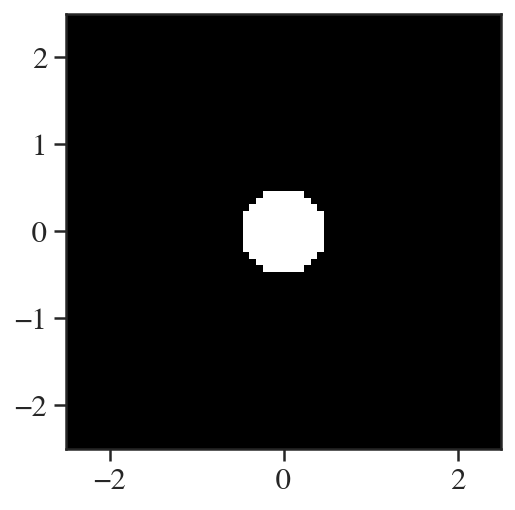

In [40]:
plt.imshow(sample_image, cmap='gray',
          extent=[-pupil_plane_size/2, pupil_plane_size/2, -pupil_plane_size/2, pupil_plane_size/2])